<a href="https://colab.research.google.com/github/gyuseonge-chae/bigdata-machinelearning/blob/main/NYATS_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/nyats_team_mlproject/NYATS_2003_2018_PublicUse.csv', low_memory=False)
df.tail(10)

,year,wave,annualwt,geostr,mode,sample_frame,svyarm,NYC,ROS,agecat,...,l9_2,l10,l10_2,l11,l11_2,l12,l12a,l12a_oth,l12b,l13
83763,2018,58,2149.876527,46,CATI,2,1.0,0.0,1.0,6.0,...,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN
83764,2018,58,8999.005139,46,CATI,2,1.0,0.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN
83765,2018,58,2632.853883,46,CATI,2,1.0,0.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83766,2018,58,1634.999019,46,CATI,2,1.0,1.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN
83767,2018,58,2687.803309,46,CATI,2,1.0,0.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN
83768,2018,58,6893.023964,46,CATI,2,1.0,0.0,1.0,2.0,...,1.0,NaN,1.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN
83769,2018,58,5358.636664,46,CATI,2,1.0,1.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN
83770,2018,58,1319.938924,46,CATI,2,2.0,0.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN
83771,2018,58,2364.535550,46,CATI,2,1.0,0.0,1.0,3.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0,NaN
83772,2018,58,769.453039,46,CATI,2,2.0,0.0,1.0,6.0,...,1.0,NaN,1.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN


In [ ]:
#quitline -> 금연 상담 전화
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83773 entries, 0 to 83772
Columns: 881 entries, year to l13
dtypes: float64(813), int64(17), object(51)
memory usage: 563.1+ MB


**데이터 전처리**

b1 & b3

In [ ]:
df.loc[df['b3'].isnull(), 'b3'] = df['b1']
df2012 = df[df['year']== 2012]
df2012.loc[df2012['b1'].isnull(), 'b1'] = df2012['b3']
df2012['b1'].isnull().sum()

0

In [ ]:
filtered_data = df2012[df2012['b3'].isnull()][['b1', 'b2']]
matching_values = df2012[df2012['b3'].isnull()].groupby(['b1', 'b2']).size().reset_index(name='count')
print(filtered_data)
print(matching_values)

Empty DataFrame
Columns: [b1, b2]
Index: []
Empty DataFrame
Columns: [b1, b2, count]
Index: []


In [ ]:
matching_values = df2012.groupby(['b1', 'b2', 'b3']).size().reset_index(name='count')
print(matching_values)

     b1   b2   b3  count
0  -2.0 -2.0 -2.0      1
1  -1.0  1.0 -1.0      3
2  -1.0  1.0  1.0      1
3  -1.0  3.0 -1.0      1
4  -1.0  3.0  1.0     21
5   1.0  1.0  1.0    669
6   1.0  2.0  1.0    288
7   1.0  3.0  1.0   1442
8   2.0 -1.0  1.0      1
9   2.0  1.0  1.0      2
10  2.0  1.0  2.0      1
11  2.0  2.0  1.0     14
12  2.0  2.0  2.0     33
13  2.0  3.0 -1.0      6
14  2.0  3.0  1.0   1243
15  2.0  3.0  2.0   1069


In [ ]:
df2012.loc[df2012['b3'].isnull(), 'b3'] = df2012['b1']
df2018 = df[df['year'].isin([2013,2014,2015,2016,2017, 2018])]

In [ ]:
matching_values = df2018[df2018['b3'].isnull()].groupby(['b1', 'b2']).size().reset_index(name='count')
print(matching_values)

Empty DataFrame
Columns: [b1, b2, count]
Index: []


  -b7

In [ ]:
# b7 feature 처리
# 연속 변수이므로 범주형으로 고쳐줌
# tree model은 원 핫 인코딩하면 과적합 발생이 쉽고 depth가 커지므로 원 핫 인코딩은 기피할 것

df.loc[df['b3'] == 1, 'b7'] = df.loc[df['b3'] == 1, 'b7'].fillna(17)     # 순수 결측치를 평균값인 17세로 대체
df.loc[df['b7'].isnull(), 'b7'] = 0       # 나머지는 0으로 치환
df['b7_ageCat'] = 'G'
df.loc[(df['b7'] <= 24) & (df['b7'] > 0), 'b7_ageCat'] = 'A'
df.loc[(df['b7'] <= 34) & (df['b7'] > 24), 'b7_ageCat'] = 'B'
df.loc[(df['b7'] <= 44) & (df['b7'] > 34), 'b7_ageCat'] = 'C'
df.loc[(df['b7'] <= 54) & (df['b7'] > 44), 'b7_ageCat'] = 'D'
df.loc[(df['b7'] <= 64) & (df['b7'] > 54), 'b7_ageCat'] = 'E'
df.loc[df['b7'] > 64, 'b7_ageCat'] = 'F'

  -smktype2

In [ ]:
# smktype2를 target label로 설정
# 학습을 위해 category를 0부터 시작하도록 변경

df.loc[df['smktype2'] == 1, 'smktype2'] = 0
df.loc[df['smktype2'] == 2, 'smktype2'] = 1

# 금연 성공률 예측, 금연 정의 흡연자였지만
idx = df[(df['smktype2']==3)].index
df.drop(idx, inplace=True)
i = df[df['smktype2'].isna()].index
df.drop(i, inplace=True)

In [ ]:
df.smktype2.isnull().sum()

0

  -d5~d6

In [ ]:
# 결측치가 상대적으로 적은 편인 2003년에서 2007년 데이터만 사용

df2003 = df[df['year'].isin([2003,2004,2005,2006,2007])]

X = df2003.loc[:, ['b7', 'f1', 'd5a', 'd5b', 'd5c', 'd5d', 'd5e', 'd5f', 'd6']]
y = df2003.loc[:, 'smktype2']

# d5~d6feature 중 일부 문항이 비슷함
# 해가 지남에 따라 문항의 어투, 단어 등만 살짝 달라진 것으로 추측
# 통합해도 될만큼 유사한 문항이므로 feature를 줄이기 위해 한 column으로 압축
df2003.loc[df2003['d5f'].isnull(), 'd5f'] = df2003['d6']
df2003 = df2003.loc[df2003['f1'].notna(), ['smktype2', 'b7', 'f1', 'd5a', 'd5b', 'd5c', 'd5d', 'd5e', 'd5f', 'd6']]
df2003 = df2003[~((df2003['d5a'].notnull()) & (df2003['d5b'].isnull()))]
df2003 = df2003[~((df2003['d5a'].notnull()) & (df2003['d5d'].isnull()))]

X.loc[X['d5f'].isnull(), 'd5f'] = X['d6']

In [ ]:
df2003

,smktype2,b7,f1,d5a,d5b,d5c,d5d,d5e,d5f,d6
1,1.0,18.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,15.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,17.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,20.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
36774,1.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36776,1.0,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36779,0.0,14.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,NaN
36780,1.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_counts = df2003['b3'].value_counts()
print(y_counts)

KeyError: ignored

b1 =1 (흡연함)일 때 b3 스킵이기에 b3 Nan값에 b1 넣어줌

In [ ]:
df['b3'].isnull().sum()

0

In [ ]:
df2003['b3'].value_counts()

KeyError: ignored

In [ ]:
df2003 = df2003.loc[df2003['f1'].notna()]

**모델 구축 시작**

In [ ]:
import lightgbm as lgbm
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

(11576, 9) (3618, 9) (11576,) (3618,) (2894, 9) (2894,)


In [ ]:
# xgboost model 구축 시작

    # 하이퍼 파라미터 튜닝 hyperopt 사용


        # 검색 공간 설정
from hyperopt import hp, STATUS_OK, fmin, tpe, Trials

xgb_search_space = {
    'max_depth': hp.quniform("max_depth", 3, 12, 1), # max_depth는 정수를 받으므로 추후 형변환할것
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),   # 형변환 필요
    'learning_rate': hp.uniform('learning_rate', 0.1, 0.3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
    'min_split_loss': hp.uniform ('min_split_loss', 1, 9),
    'alpha' : hp.uniform('alpha', 0.001, 0.1)
}


        # 목적 함수 설정
            # 수행 시간 절약을 위해 estimator를 축소시킴
def objective_func(search_space):
    xgb_clf = XGBClassifier(
                            n_estimators=200,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            subsample=search_space['subsample'],
                            colsample_bytree=search_space['colsample_bytree'],
                            min_split_loss=search_space['min_split_loss'],
                            alpha=search_space['alpha']
)

    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

    return {'loss':np.mean(accuracy), 'status': STATUS_OK}


        # 평가 함수 정의
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  print('오차행렬: ' ,confusion)
  sns.heatmap(confusion, annot=True, fmt='g')


        # fmin 함수
trial_val = Trials()     # 입력 결과를 저장할 객체 생성
best = fmin(
            fn=objective_func,   # 목적 함수
            space=xgb_search_space,   # 검색 공간
            algo=tpe.suggest,    # 베이지안 최적화 적용 알고리즘
            max_evals=50,   # 입력 시도 횟수
            trials=trial_val,     # 시도한 입력 값 및 입력 결과 저장
            rstate=np.random.default_rng(seed=9)
)
print('best hyper parameters:', best)

100%|██████████| 50/50 [02:47<00:00,  3.35s/trial, best loss: 0.7720276967170879]
best hyper parameters: {'alpha': 0.09609833395242935, 'colsample_bytree': 0.660039087344974, 'learning_rate': 0.2786550284333075, 'max_depth': 9.0, 'min_child_weight': 8.0, 'min_split_loss': 8.766149043382061, 'subsample': 0.9934729425705071}


[0]	validation_0-logloss:0.63445	validation_1-logloss:0.63114
[1]	validation_0-logloss:0.60137	validation_1-logloss:0.59550
[2]	validation_0-logloss:0.54701	validation_1-logloss:0.53779
[3]	validation_0-logloss:0.53638	validation_1-logloss:0.52600
[4]	validation_0-logloss:0.50889	validation_1-logloss:0.49577
[5]	validation_0-logloss:0.50512	validation_1-logloss:0.49134
[6]	validation_0-logloss:0.49042	validation_1-logloss:0.47408
[7]	validation_0-logloss:0.48149	validation_1-logloss:0.46323
[8]	validation_0-logloss:0.47935	validation_1-logloss:0.46155
[9]	validation_0-logloss:0.47896	validation_1-logloss:0.46098
[10]	validation_0-logloss:0.47452	validation_1-logloss:0.45510
[11]	validation_0-logloss:0.47197	validation_1-logloss:0.45146
[12]	validation_0-logloss:0.47056	validation_1-logloss:0.44922
[13]	validation_0-logloss:0.46971	validation_1-logloss:0.44798


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-logloss:0.46881	validation_1-logloss:0.44697
[15]	validation_0-logloss:0.46843	validation_1-logloss:0.44630
[16]	validation_0-logloss:0.46801	validation_1-logloss:0.44588
[17]	validation_0-logloss:0.46801	validation_1-logloss:0.44587
[18]	validation_0-logloss:0.46801	validation_1-logloss:0.44587
[19]	validation_0-logloss:0.46801	validation_1-logloss:0.44587
[20]	validation_0-logloss:0.46801	validation_1-logloss:0.44587
[21]	validation_0-logloss:0.46751	validation_1-logloss:0.44583
[22]	validation_0-logloss:0.46751	validation_1-logloss:0.44583
[23]	validation_0-logloss:0.46751	validation_1-logloss:0.44582
[24]	validation_0-logloss:0.46751	validation_1-logloss:0.44582
[25]	validation_0-logloss:0.46751	validation_1-logloss:0.44582
[26]	validation_0-logloss:0.46751	validation_1-logloss:0.44582
[27]	validation_0-logloss:0.46751	validation_1-logloss:0.44582
[28]	validation_0-logloss:0.46751	validation_1-logloss:0.44582
[29]	validation_0-logloss:0.46751	validation_1-logloss:

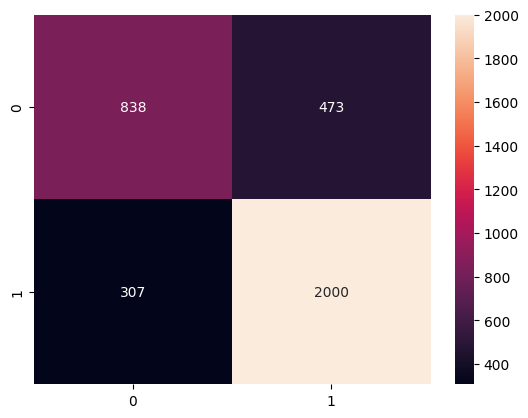

In [ ]:
    # xgb 모델 선언
xgb_wrapper = XGBClassifier(
                            n_estimators=200,
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            learning_rate=best['learning_rate'],
                            subsample=best['subsample'],
                            colsample_bytree=best['colsample_bytree'],
                            min_split_loss=best['min_split_loss'],
                            alpha=best['alpha']
)

evals = [(X_train, y_train), (X_val, y_val)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=15, eval_metric='logloss', eval_set=evals, verbose=1)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

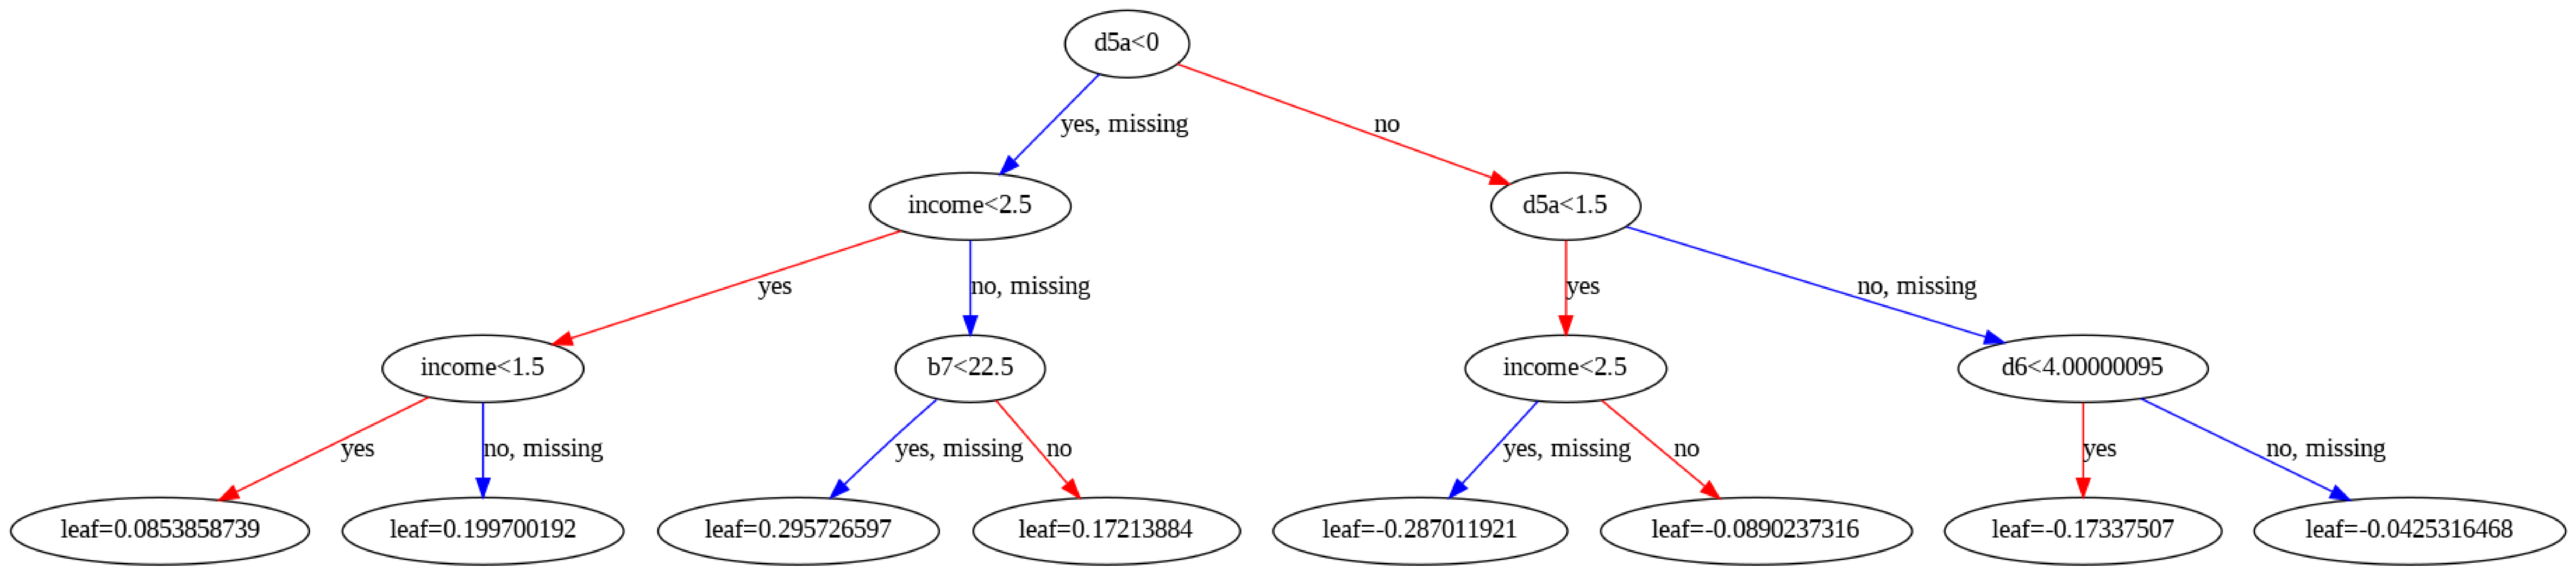

In [ ]:
# 의사 결정 트리 시각화

%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100, 200

# 의사 결정 트리 시각화
plot_tree(xgb_wrapper, max_depth=0)
plt.show()

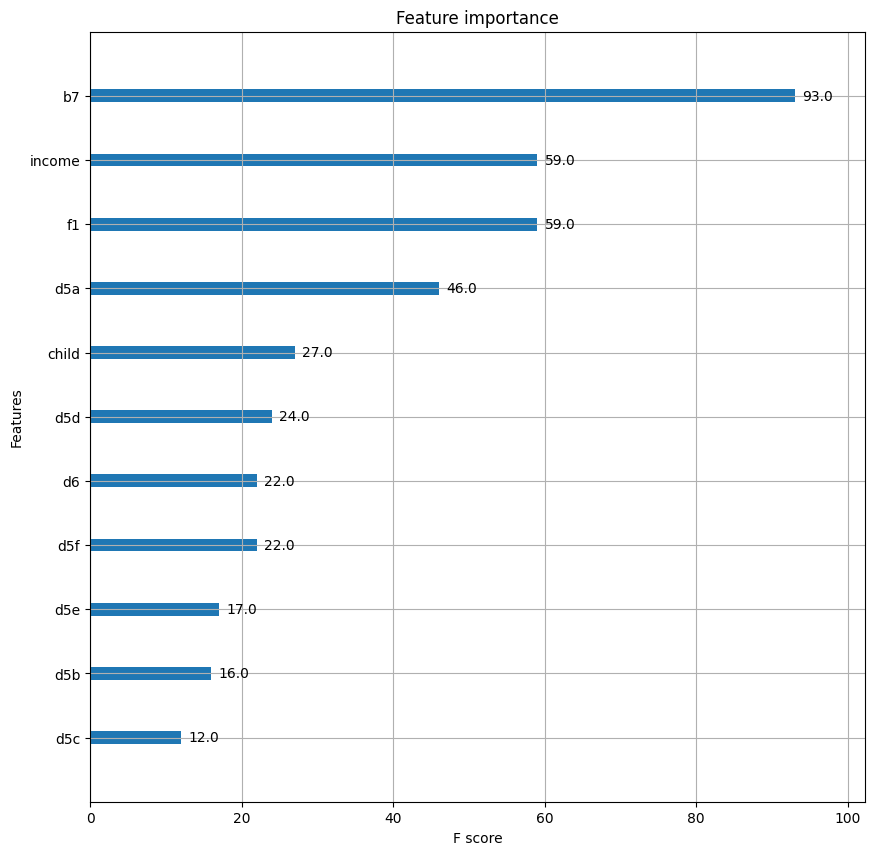

In [ ]:
# feature 중요도 시각화

from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10
plot_importance(xgb_wrapper)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
X['f1'].value_counts()

 1.0    10579
 4.0     3375
 2.0     2900
 3.0     1185
-1.0       33
-2.0       16
Name: f1, dtype: int64

In [ ]:
predict_f1 = info_plots.PredictPlot(
    model=xgb_wrapper,
    df=X_train,
    model_features=X_train.columns,
    feature="f1",
    feature_name="f1",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

fig, axes, summary_df = predict_f1.plot(
    figsize=(1000,1500),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

obtain pred_func from the provided model.


In [ ]:
target_f1 = info_plots.TargetPlot(
    df=df2003,
    feature="f1",
    feature_name="f1",
    target=df2003.columns[0]
)

fig, axes, summary_df = target_f1.plot(
    figsize=(1000,1000),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
predict_b7 = info_plots.PredictPlot(
    model=xgb_wrapper,
    df=X_train,
    model_features=X_train.columns,
    feature="b7",
    feature_name="b7",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

fig, axes, summary_df = predict_b7.plot(
    figsize=(1000,1500),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

obtain pred_func from the provided model.


In [ ]:
target_b7 = info_plots.TargetPlot(
    df=df2003,
    feature="b7",
    feature_name="b7",
    target=df2003.columns[0]
)

fig, axes, summary_df = target_b7.plot(
    figsize=(1000,1000),
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
target_f1_b7 = info_plots.InteractTargetPlot(
    df=df2003,
    features=["f1", "b7"],
    feature_names=["f1", "b7"],
    target=df2003.columns[0],
    num_grid_points=20,
    grid_types="percentile",
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
)
fig, axes, summary_df = target_f1_b7.plot(
    show_percentile=True,
    figsize=(1200, 1000),
    annotate=True,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
from pdpbox import pdp, info_plots

pdp_b7_f1 = pdp.PDPInteract(
    model=xgb_wrapper,
    df=X,
    model_features=X,
    features=["f1", "b7"],
    feature_names=["f1", ""],
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
)

obtain pred_func from the provided model.


  0%|          | 0/5 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/45 [00:00<?, ?it/s]

In [ ]:
fig, axes = pdp_b7_f1.plot(
    plot_type='contour',
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
# ligthgbm model 구축 시작

    # 하이퍼 파라미터 튜닝

        # 검색 공간 설정 (정수 파라미터들은 추후 정수형변환 필요)
lgbm_search_space = {
                    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
                    'max_depth':  hp.quniform('max_depth', 3, 6, 1),
                    'num_leaves':  hp.quniform('num_leaves', 30, 50, 1)
}


        # 목적 함수 설정
def objective_func(search_space):
  lgbm_clf = LGBMClassifier(
                            objetive = 'binary',
                            metric ='auc',
                            n_estimators=200,
                            boosting_type=search_space['boosting_type'],
                            max_depth=int(search_space['max_depth']),
                            num_leaves=int(search_space['num_leaves']),
                            random_state=42
  )

  accuracy = cross_val_score(lgbm_clf, X_train, y_train, scoring='accuracy', cv=3)

  return {'loss':np.mean(accuracy), 'status': STATUS_OK}

        # 평가 함수 정의
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  print('오차행렬: ' ,confusion)
  sns.heatmap(confusion, annot=True, fmt='g')


    # fmin
trial_val = Trials()
best = fmin(
            fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=30,
            trials= trial_val,
            rstate=np.random.default_rng(seed=9)
)

print('best hyper parameters:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: objetive
[LightGBM] [Warning] Unknown parameter: objetive
[LightGBM] [Warning] Unknown parameter: o

In [ ]:
       # 모델 선언
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(
                              n_estimators=100,
                              random_state=42
)

evals = [(X_train, y_train), (X_val, y_val)]
lgbm_wrapper.fit(X_train, y_train, eval_metric='logloss', eval_set=evals)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 7343, number of negative: 4233
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 11576, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.634330 -> initscore=0.550837
[LightGBM] [Info] Start training from score 0.550837


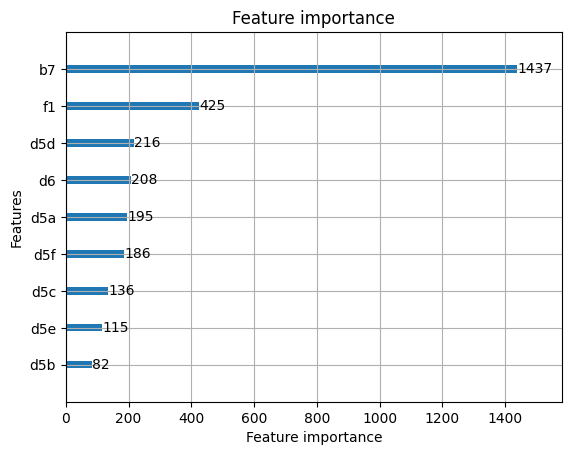

<Figure size 800x600 with 0 Axes>

In [ ]:
# feature 중요도 시각화

from lightgbm import plot_importance

plot_importance(lgbm_wrapper)
plt.yticks(fontsize=10)
plt.figure(figsize=(8,6))
plt.show()